<a href="https://colab.research.google.com/github/WillintonMbUsa/WillintonMbUsa.github.io/blob/main/Armado_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import glob
import torch
import pickle

# Armar lista de rutas

In [ ]:
patron_archivos = "*.pt"

In [ ]:
codellama_chat_url = "/content/drive/MyDrive/Hidden States/CodeLlama-7b-Instruct-hf"
codellama_python_url = "/content/drive/MyDrive/Hidden States/CodeLlama-7b-Python-hf"
codellama_nl_url = "/content/drive/MyDrive/Hidden States/CodeLlama-7b-hf"
codegen_python_url = "/content/drive/MyDrive/Hidden States/codegen-6B-mono"
codegen_multi_url = "/content/drive/MyDrive/Hidden States/codegen-6B-multi"
codegen_nl_url = "/content/drive/MyDrive/Hidden States/codegen-6B-nl"

In [ ]:
codellama_chat = glob.glob(f'{codellama_chat_url}/{patron_archivos}')
codellama_python = glob.glob(f'{codellama_python_url}/{patron_archivos}')
codellama_nl = glob.glob(f'{codellama_nl_url}/{patron_archivos}')
codegen_python = glob.glob(f'{codegen_python_url}/{patron_archivos}')
codegen_multi = glob.glob(f'{codegen_multi_url}/{patron_archivos}')
codegen_nl = glob.glob(f'{codegen_nl_url}/{patron_archivos}')

In [ ]:
models_url = [codellama_chat_url, codellama_python_url, codellama_nl_url,
          codegen_python_url, codegen_multi_url, codegen_nl_url]
models = [codellama_chat, codellama_python, codellama_nl,
          codegen_python, codegen_multi, codegen_nl]

In [ ]:
HS_url_list = []
for i, model_url in enumerate(models_url):
  models[i] = glob.glob(f'{model_url}/{patron_archivos}')
  sortedList = sorted(models[i])
  sortedList.sort(key=len)
  HS_url_list.append(sortedList)

In [ ]:
!pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 3.8 MB/s eta 0:00:00


In [ ]:
df = pd.DataFrame(HS_url_list)
writer = pd.ExcelWriter('test.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='welcome', index=False)
writer.save()

<ipython-input-10-44a613551edd>:4: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


# Cargar DataSet de rutas

In [ ]:
hidden_states_url = "/content/drive/MyDrive/Hidden States/DataSet.xlsx"

In [ ]:
hidden_states = pd.read_excel(hidden_states_url)

In [ ]:
hidden_states_4_convert = hidden_states.drop("HiddenStates_Url", axis=1)

In [ ]:
df = pd.DataFrame(hidden_states_4_convert)

In [ ]:
df

,HumanEval/0,HumanEval/1,HumanEval/2,HumanEval/3,HumanEval/4,HumanEval/5,HumanEval/6,HumanEval/7,HumanEval/8,HumanEval/9,...,HumanEval/160,HumanEval/161,HumanEval/162,HumanEval/163,codellama,codegen,nl,multi,python,chat
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
980,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
981,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
982,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
df_codellama = df[df["codellama"] == 1]

In [ ]:
df_codegen = df[df["codegen"] == 1]

In [ ]:
df_nl = df[df["nl"] == 1]
df_multi = df[df["multi"] == 1]
df_python = df[df["python"] == 1]
df_chat = df[df["chat"] == 1]

In [ ]:
df_nl.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            646, 647, 648, 649, 650, 651, 652, 653, 654, 655],
           dtype='int64', length=328)

In [ ]:
data = []
arrays = []

for i in range(0, len(hidden_states.values), 100):
  print(i, end=' ')
  state = torch.load(hidden_states.values[i][-1], map_location=torch.device('cpu'))
  stack = torch.stack(state, dim=0)
  del state
  array = stack[-1][0].to(torch.float32).detach().numpy()
  arrays.append(array)
  del array
  del stack
  data.append(hidden_states_4_convert.values[i].tolist())


0 100 200 300 400 500 600 700 800 900 

In [ ]:
arrays[2]

array([[-2.078125  , -0.8515625 ,  0.11425781, ...,  0.22460938,
         0.47851562, -0.55078125],
       [-0.82421875, -1.0390625 , -0.6796875 , ...,  0.89453125,
         1.1484375 , -0.20019531],
       [-1.4375    , -0.86328125,  0.51171875, ...,  0.6171875 ,
         0.5625    , -0.74609375],
       ...,
       [-0.45898438, -0.34765625, -1.6875    , ...,  0.37890625,
         0.03112793,  0.2578125 ],
       [ 0.30664062,  1.2421875 , -1.453125  , ..., -0.09033203,
         0.01086426,  0.6171875 ],
       [-1.21875   ,  0.34179688, -1.5625    , ...,  1.09375   ,
         0.61328125,  0.73046875]], dtype=float32)

In [ ]:
with open('/content/drive/MyDrive/Hidden States/data.pkl', 'wb') as f:
  pickle.dump(data, f)
with open('/content/drive/MyDrive/Hidden States/arrays.pkl', 'wb') as f:
  pickle.dump(arrays, f)


# Cargar dataset con estados

In [ ]:
# prompt: cargar pkl

with open('/content/drive/MyDrive/Hidden States/arrays.pkl', 'rb') as f:
  arrays = pickle.load(f)

with open('/content/drive/MyDrive/Hidden States/data.pkl', 'rb') as f:
  data = pickle.load(f)


In [ ]:
len(data)

984

In [ ]:
for array in arrays:
  print(array.shape)

In [ ]:
# Normalizar los datos
scaler = StandardScaler()
features_normalized = [scaler.fit_transform(array) for array in arrays]

In [ ]:
# Imprimir los parámetros
print("Media:", scaler.mean_)
print("Varianza:", scaler.var_)
print("Escalas:", scaler.scale_)

Media: [-2.77510618  3.39892578 -2.71220887 ...  3.43662823 -4.64214973
  2.387541  ]
Varianza: [2.85028184 5.38777532 2.78640611 ... 2.83580524 3.80341481 2.53588081]
Escalas: [1.68827777 2.32115818 1.66925316 ... 1.68398493 1.95023455 1.59244492]


In [ ]:
longitud_maxima_dim0 = max(array.shape[0] for array in features_normalized)

# Ajustar la dimensión 1 de cada tensor
arrays_ajustados = [
    np.pad(array, ((0, longitud_maxima_dim0 - array.shape[0]), (0, 0)), 'constant', constant_values=0)
    if array.shape[0] < longitud_maxima_dim0
    else array
    for array in arrays
]

In [ ]:
for array in arrays_ajustados:
  if array.ndim > 2:
    print(array)

In [ ]:
with open('/content/drive/MyDrive/Hidden States/arrays_resized.pkl', 'wb') as f:
  pickle.dump(arrays_ajustados, f)

# Procesar Dataset

In [ ]:
with open('/content/drive/MyDrive/Hidden States/data.pkl', 'rb') as f:
  data = pickle.load(f)

In [ ]:
with open('/content/drive/MyDrive/Hidden States/arrays_resized.pkl', 'rb') as f:
  arrays = pickle.load(f)

...

In [ ]:
# prompt: guardar DataFrame "df" a disco local
df.to_csv('/content/drive/MyDrive/Hidden States/dataFrame.csv', index=False)

In [ ]:
features = df.iloc[:, -1].values

In [ ]:
feature_List = []
for feature in features:
  feature_List.append(feature.tolist())

In [ ]:
feature_List

In [ ]:
features[0].tolist()

#PCA

In [ ]:
features_flatten = np.concatenate(arrays).reshape((len(arrays), -1))

In [ ]:
# prompt: crear un nuevo array con cada elemento de "hidden_states_4_convert"  acontinuación de el respectivo elemento de "features_flatten"

combined_array = np.concatenate((hidden_states_4_convert.values, features_flatten), axis=1)


In [ ]:
with open('/content/drive/MyDrive/Hidden States/dataset.pkl', 'wb') as f:
  pickle.dump(combined_array, f)

In [ ]:
del features_flatten
del hidden_states_4_convert
del hidden_states
del arrays

In [ ]:
with open('/content/drive/MyDrive/Hidden States/dataset.pkl', 'rb') as f:
  combined_array = pickle.load(f)

In [ ]:
# prompt: tomar unicamente desde el elemento 492 para adelante de combined_array

combined_array_reduced = combined_array[df_nl.index]


In [ ]:
len(df_nl.index)

328

In [ ]:
# Aplicar reducción de dimensionalidad (PCA)
n_components = 164
pca = PCA(n_components=n_components, whiten=False)
features_pca = pca.fit_transform(combined_array_reduced)

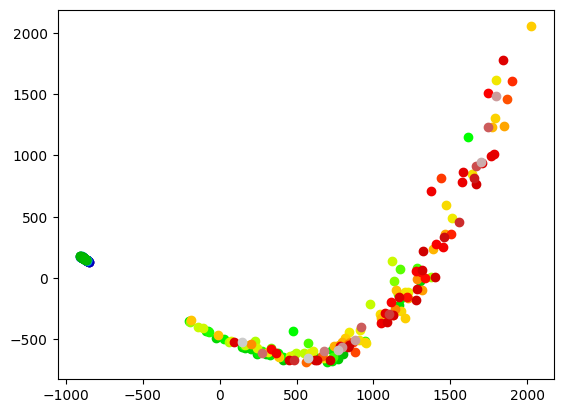

In [ ]:
colors = cm.nipy_spectral(np.linspace(0, 1, len(features_pca)))
for i in range(len(features_pca)):
  plt.scatter(features_pca[i, 0], features_pca[i, 1], color=colors[i])
plt.show()


In [ ]:
features_pca[0]

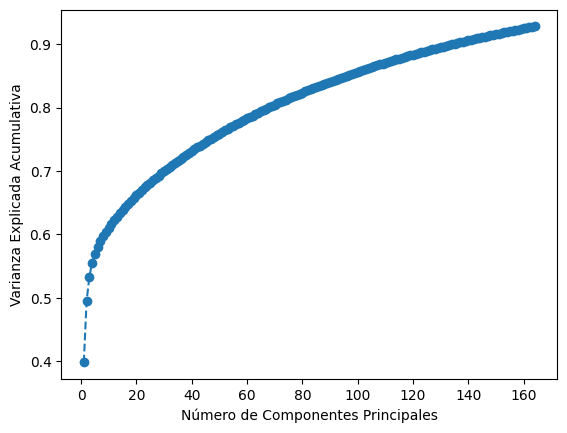

In [ ]:
# Calcular la varianza explicada acumulativa
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Graficar la varianza explicada acumulativa
plt.plot(range(1, n_components + 1), explained_variance_ratio_cumulative, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.show()

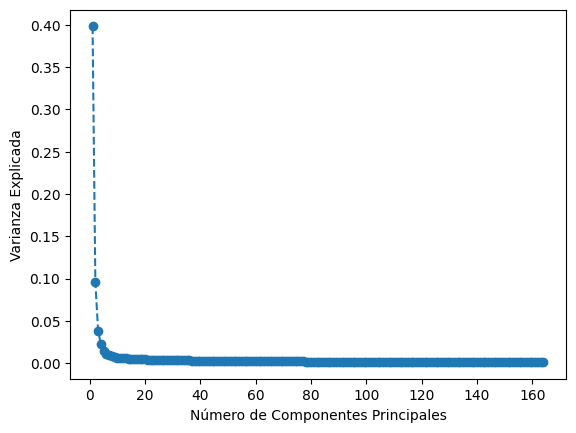

In [ ]:
# Graficar la varianza explicada para cada componente
plt.plot(range(1, n_components + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.show()

In [ ]:
del combined_array

For n_clusters = 2 The average silhouette_score is : 0.42927971882957977
For n_clusters = 3 The average silhouette_score is : 0.4233141971441356
For n_clusters = 4 The average silhouette_score is : 0.4278235383933371
For n_clusters = 5 The average silhouette_score is : 0.43219842062566755
For n_clusters = 6 The average silhouette_score is : 0.3998785363789885
For n_clusters = 7 The average silhouette_score is : 0.39573286777097005
For n_clusters = 8 The average silhouette_score is : 0.3971569933383168
For n_clusters = 9 The average silhouette_score is : 0.39802467506454625
For n_clusters = 10 The average silhouette_score is : 0.37301165452956386
For n_clusters = 11 The average silhouette_score is : 0.3770081023224504
For n_clusters = 12 The average silhouette_score is : 0.3737718798002234
For n_clusters = 13 The average silhouette_score is : 0.3757716443582731
For n_clusters = 14 The average silhouette_score is : 0.3634652818091544
For n_clusters = 15 The average silhouette_score is : 

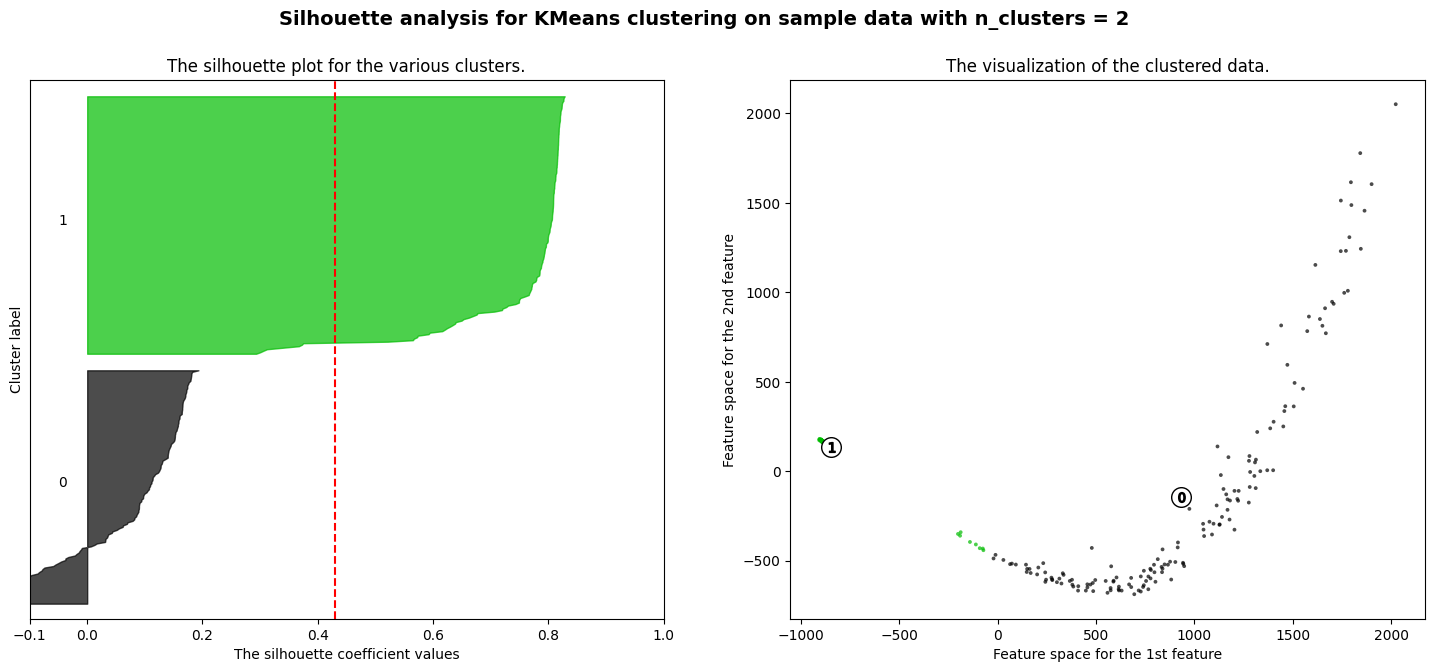

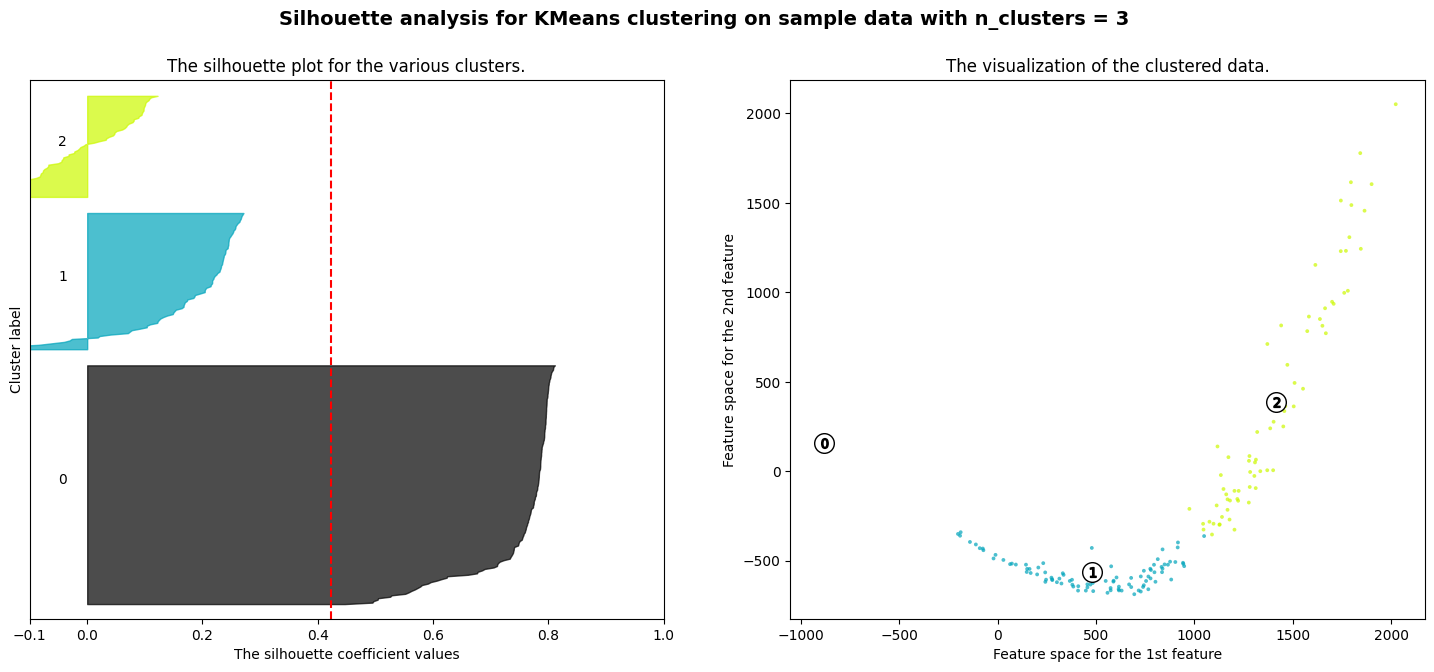

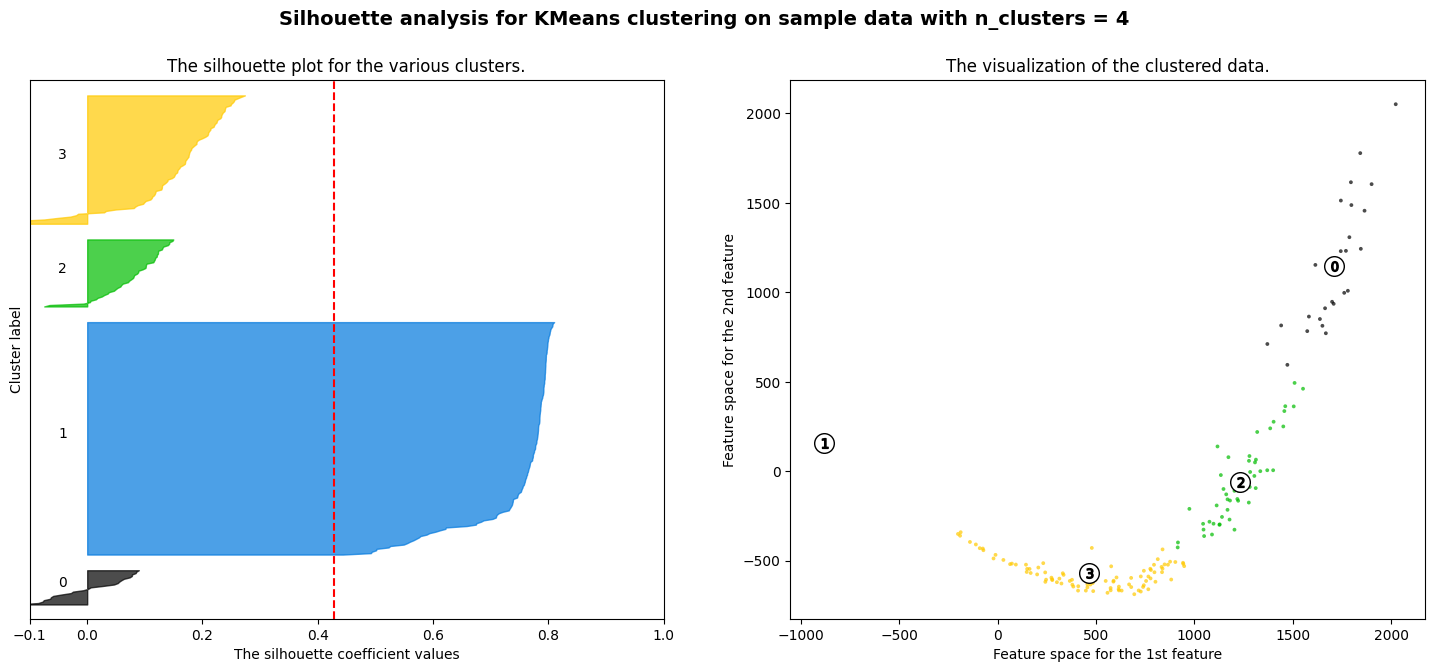

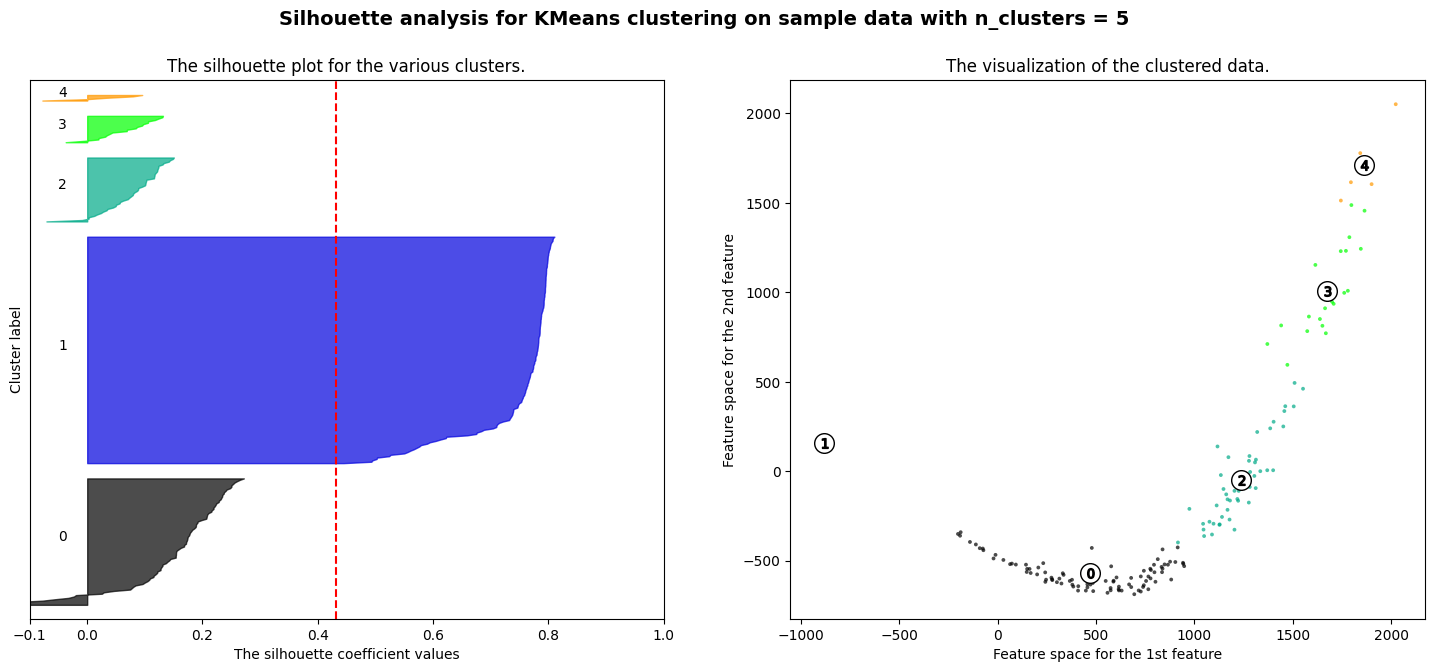

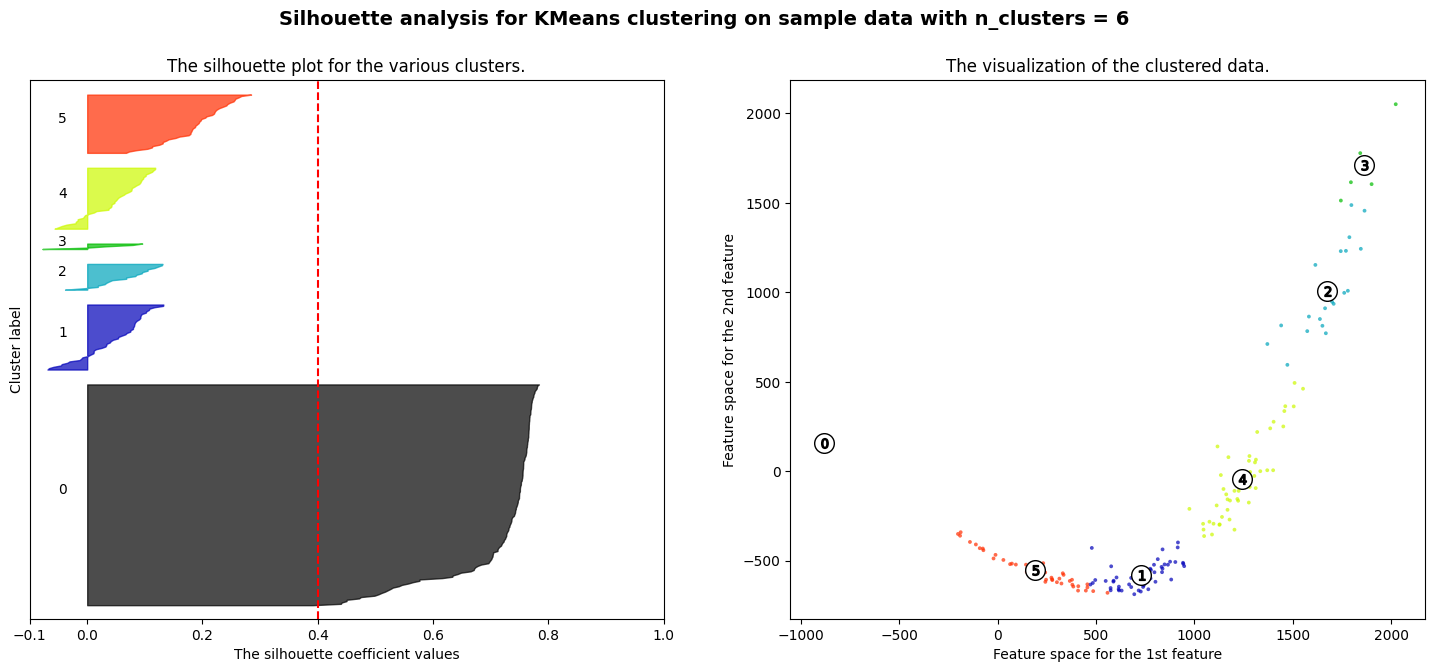

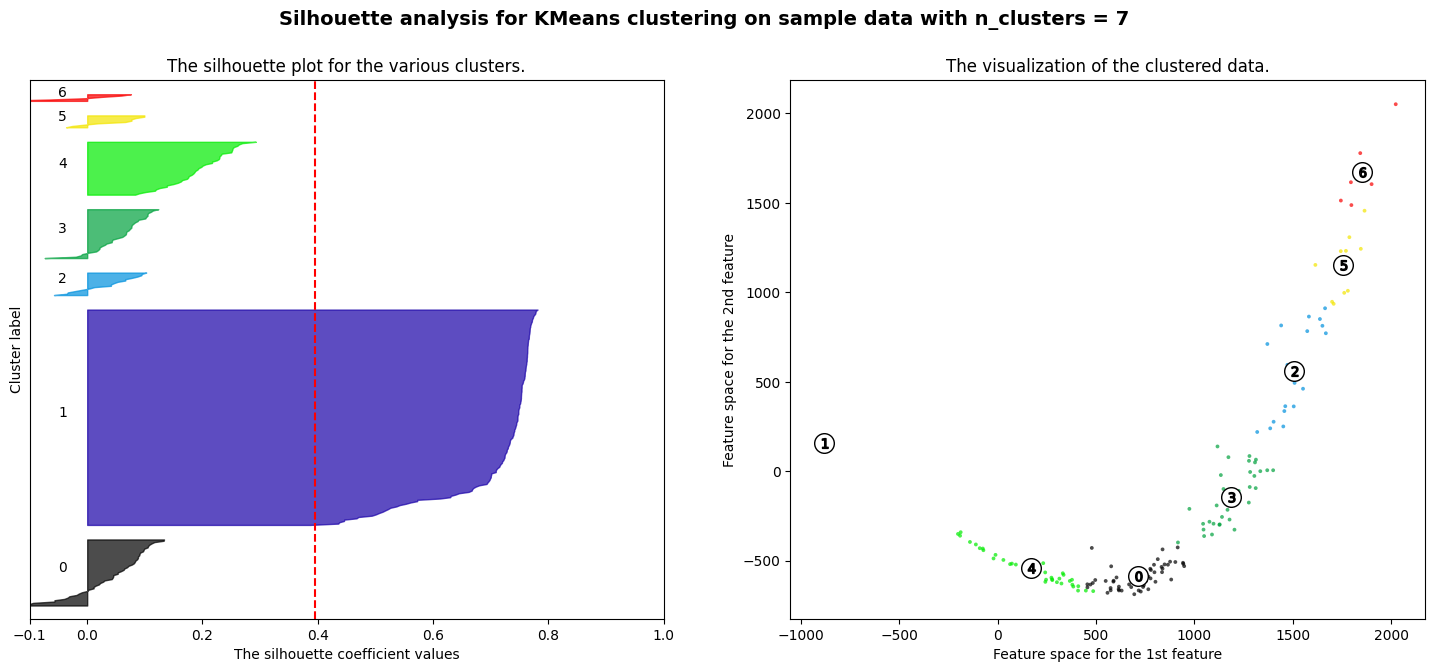

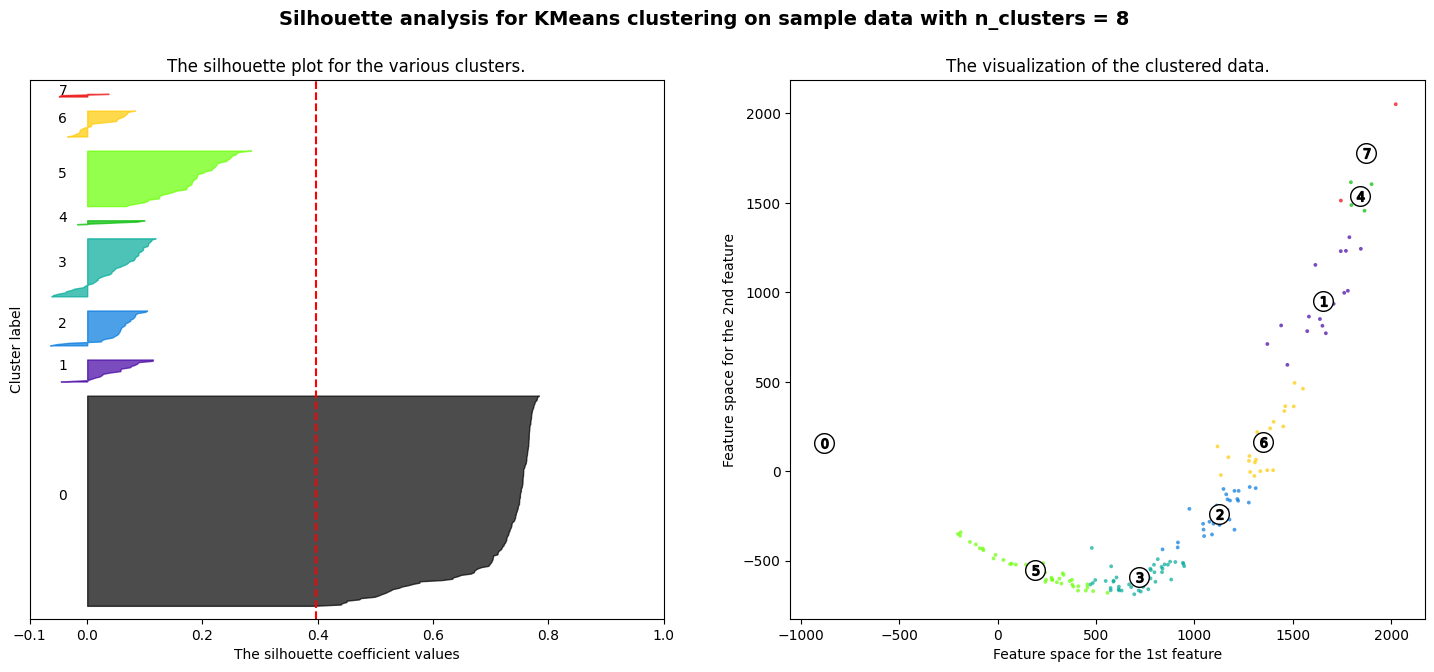

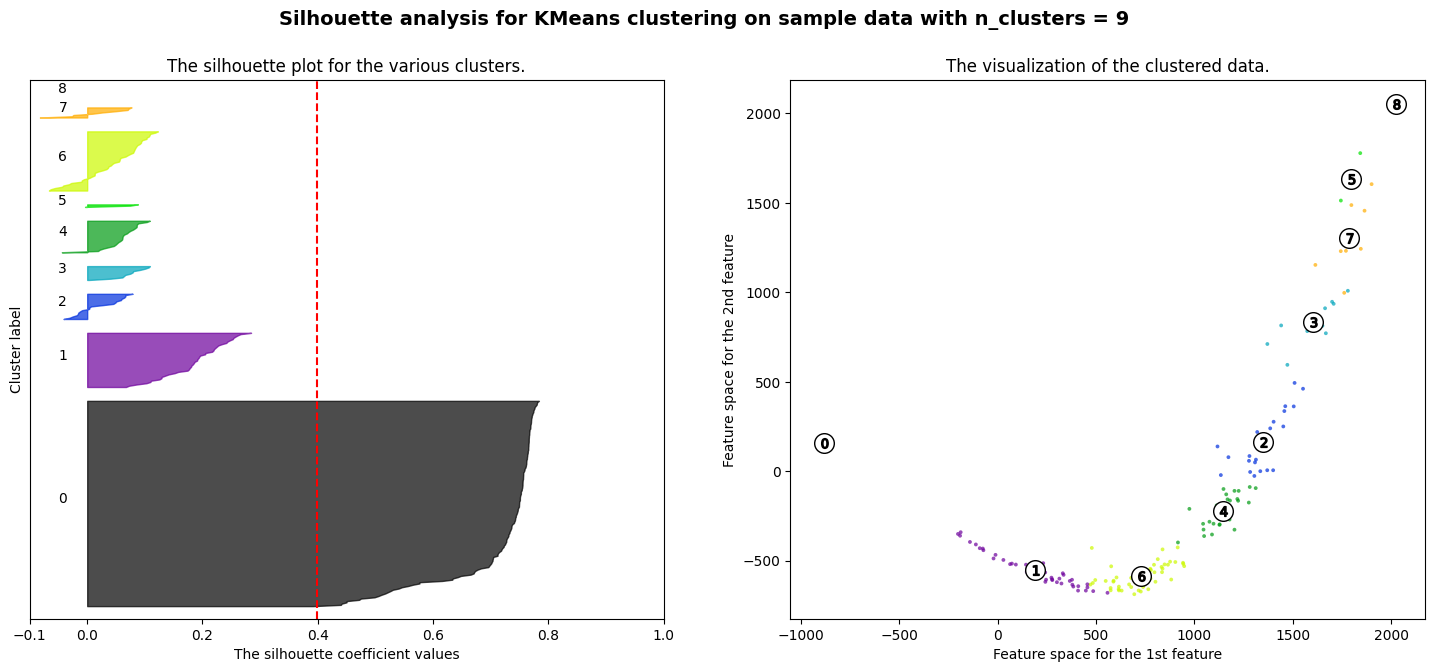

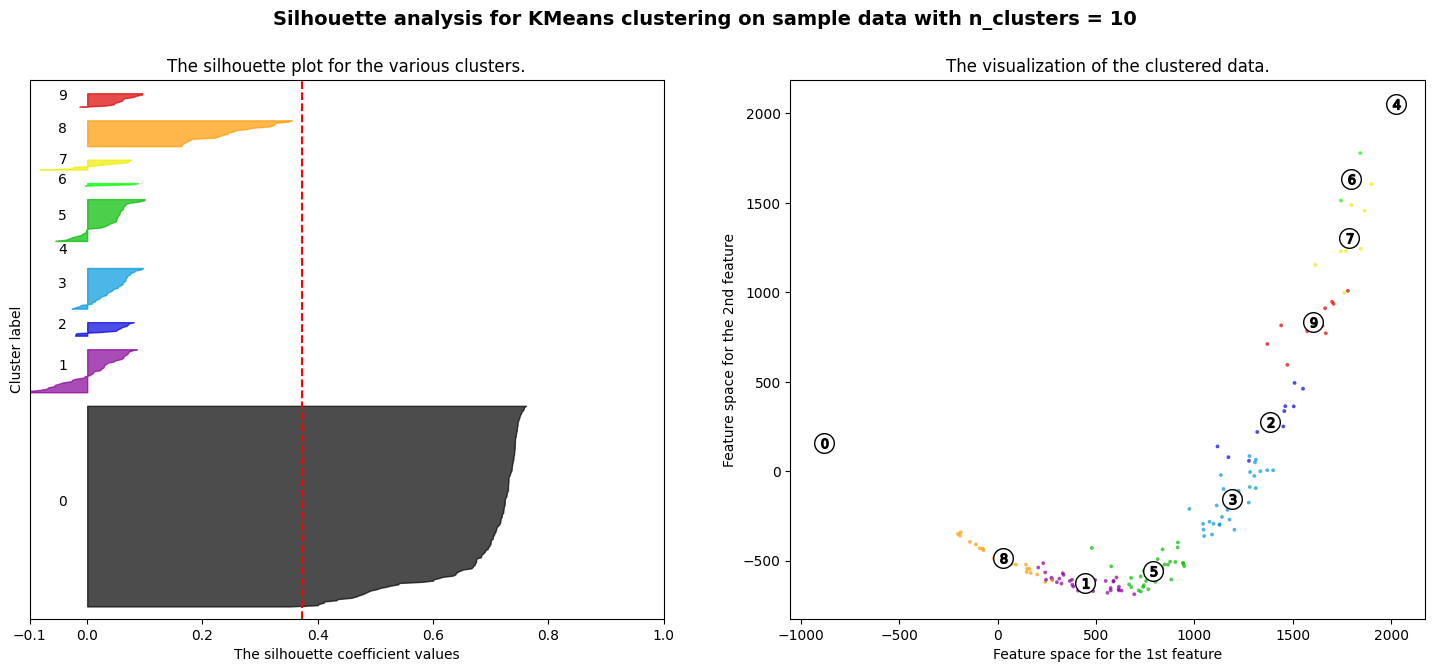

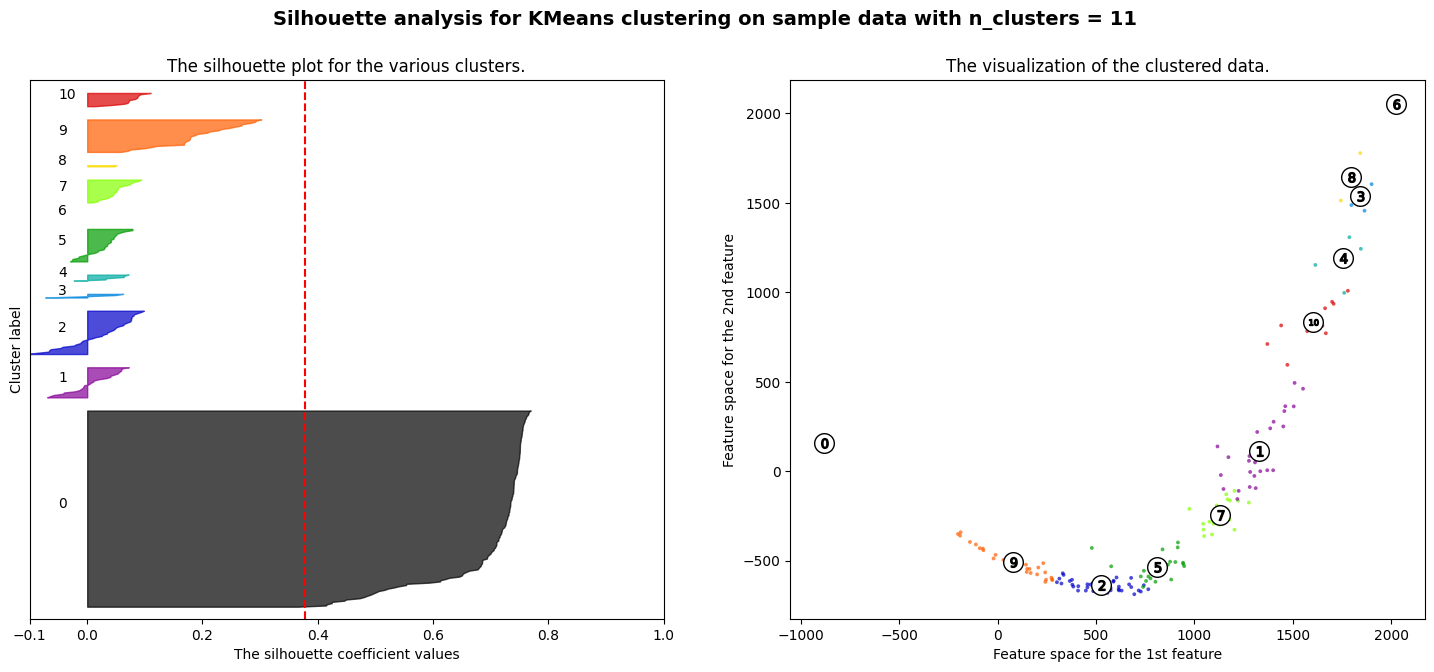

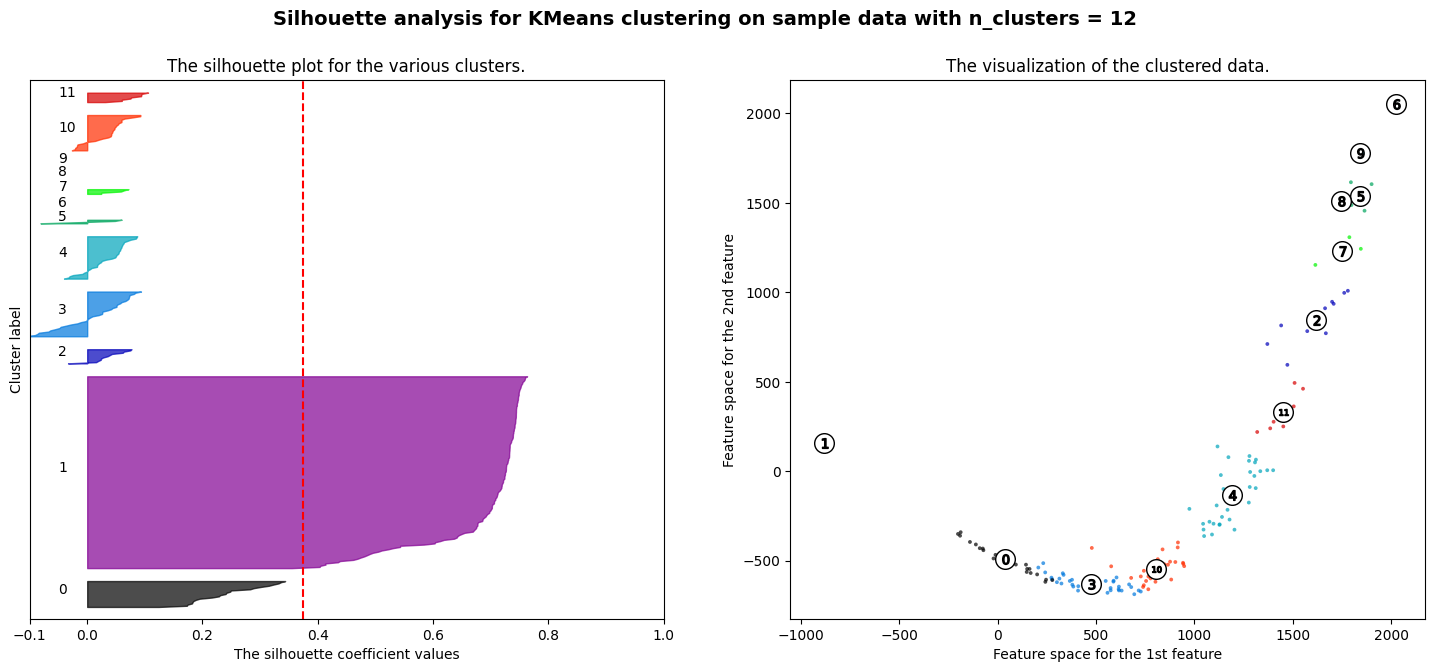

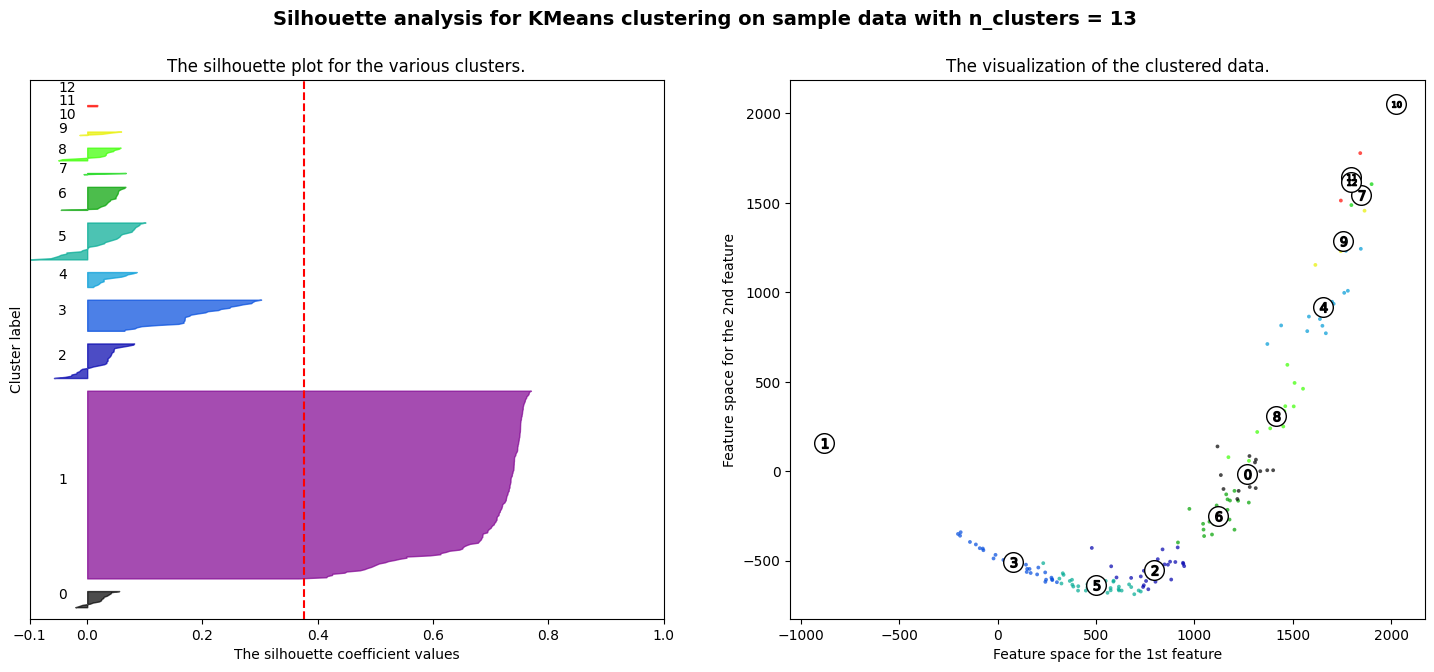

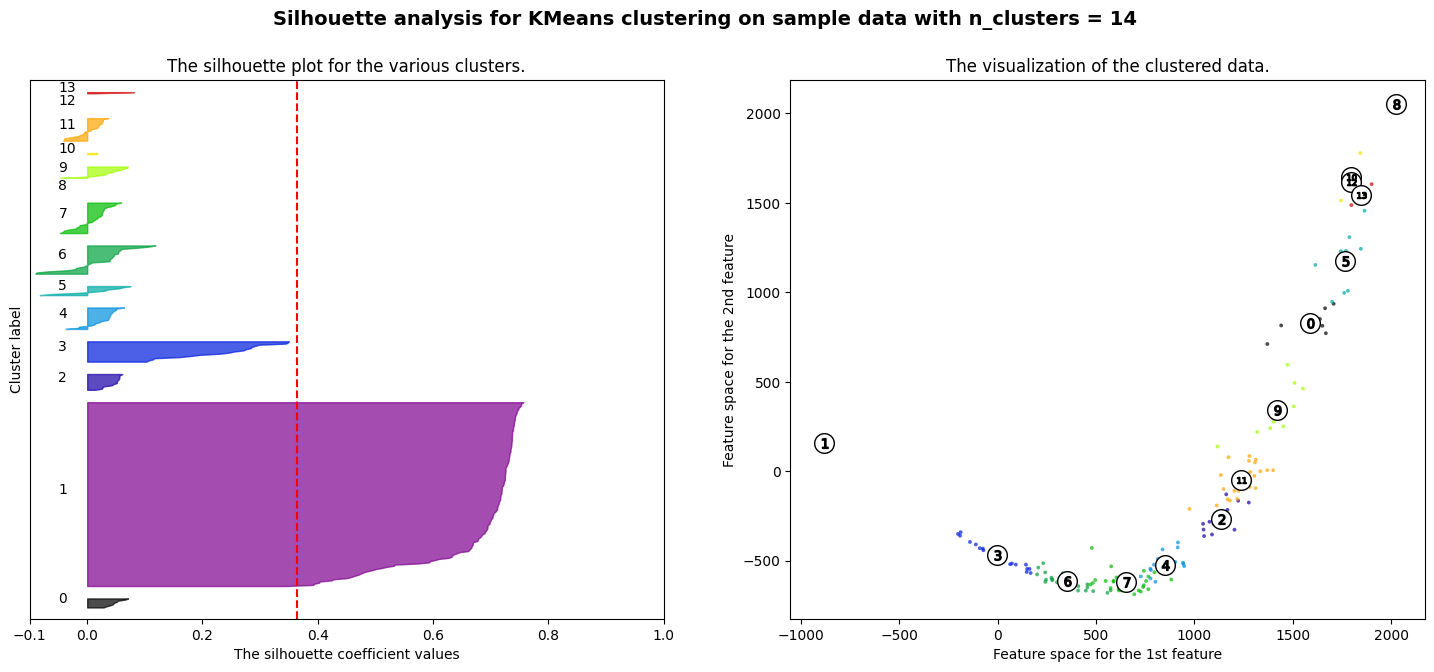

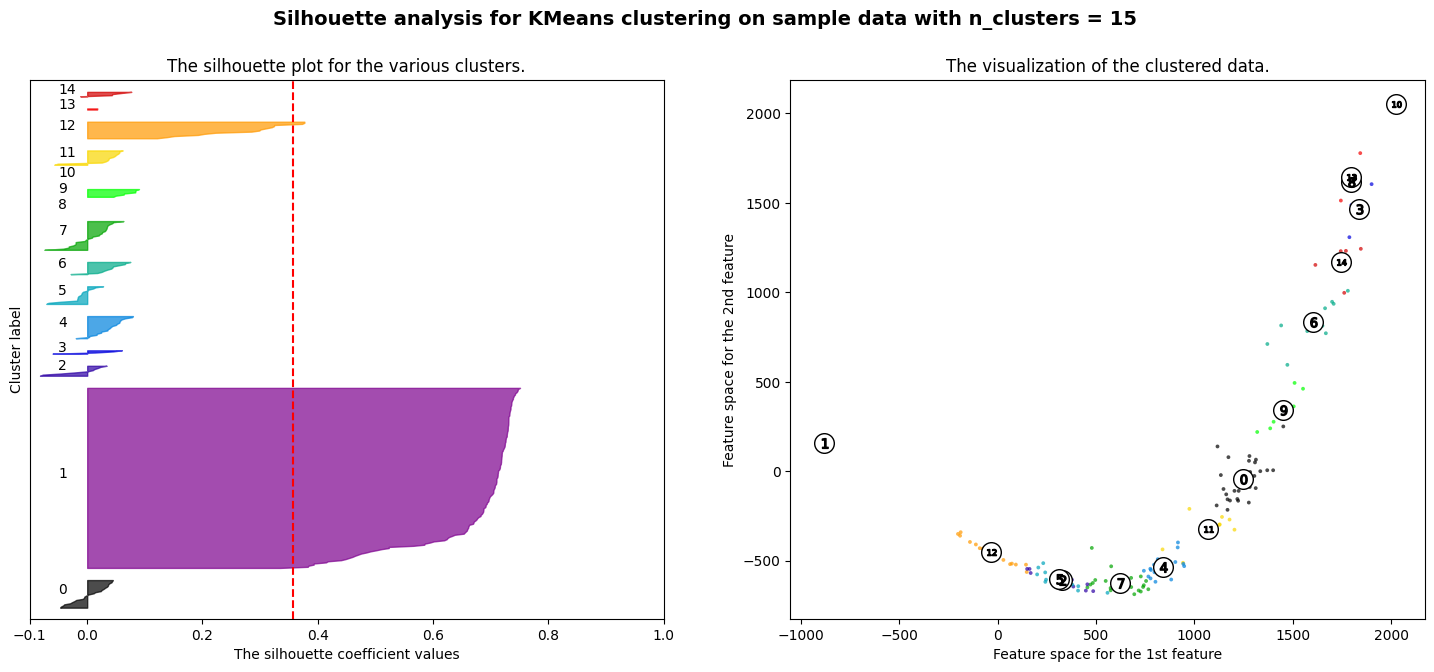

In [ ]:
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

data = features_pca

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init=20)
    cluster_labels = clusterer.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data[:, 0], data[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [ ]:
# Aplicar KMeans para todos los datos
n_clusters = 5  # ajusta el número de clusters según tus necesidades
kmeans_p = KMeans(n_clusters=n_clusters, random_state=42, n_init=20)
clusters_p = kmeans_p.fit_predict(features_pca)

In [ ]:
labels_p = kmeans_p.labels_
centroids_p = kmeans_p.cluster_centers_

In [ ]:
# prompt: calcular desde "labels_p" cuantos elementos pertenecen a cada label

import numpy as np
unique_labels, counts = np.unique(labels_p, return_counts=True)
for label, count in zip(unique_labels, counts):
  print(f"Cluster {label}: {count} elements")


Cluster 0: 5 elements
Cluster 1: 164 elements
Cluster 2: 20 elements
Cluster 3: 48 elements
Cluster 4: 91 elements


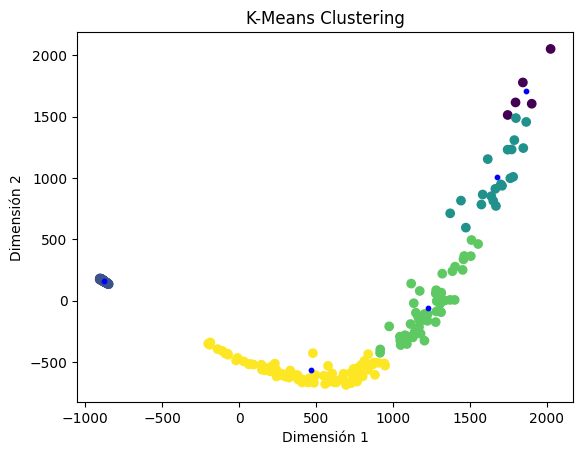

In [ ]:
# Visualización (en este caso, para dos dimensiones)
plt.figure()
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels_p, cmap='viridis')
plt.scatter(centroids_p[:, 0], centroids_p[:, 1], s=10, c='blue')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('K-Means Clustering')
plt.show()

In [ ]:
df_codegen

,HumanEval/0,HumanEval/1,HumanEval/2,HumanEval/3,HumanEval/4,HumanEval/5,HumanEval/6,HumanEval/7,HumanEval/8,HumanEval/9,...,HumanEval/160,HumanEval/161,HumanEval/162,HumanEval/163,codellama,codegen,nl,multi,python,chat
492,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
493,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
494,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
495,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
496,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
980,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
981,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
982,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
df_codellama.loc[:,170] = labels_p

<ipython-input-112-646985726c94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_codellama.loc[:,170] = labels_p


In [ ]:
df_codegen.loc[:,170] = labels_p

<ipython-input-134-e82ab3d862b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_codegen.loc[:,170] = labels_p


In [ ]:
df_codellama.loc[200]

HumanEval/0      0
HumanEval/1      0
HumanEval/2      0
HumanEval/3      0
HumanEval/4      0
              ... 
nl               0
multi            0
python           1
chat             0
170            283
Name: 200, Length: 171, dtype: int64

In [ ]:
df_codegen.iloc[:, 164:171]

,codellama,codegen,nl,multi,python,chat,170
492,0,1,1,0,0,0,45
493,0,1,1,0,0,0,45
494,0,1,1,0,0,0,162
495,0,1,1,0,0,0,217
496,0,1,1,0,0,0,45
...,...,...,...,...,...,...,...
979,0,1,0,0,1,0,24
980,0,1,0,0,1,0,16
981,0,1,0,0,1,0,155
982,0,1,0,0,1,0,232


In [ ]:
# prompt: mostrar las columnas 164 a 169 de df

df_codellama.iloc[:, 164:171]


,codellama,codegen,nl,multi,python,chat,170
0,1,0,1,0,0,0,244
1,1,0,1,0,0,0,102
2,1,0,1,0,0,0,265
3,1,0,1,0,0,0,198
4,1,0,1,0,0,0,183
...,...,...,...,...,...,...,...
487,1,0,0,0,0,1,6
488,1,0,0,0,0,1,28
489,1,0,0,0,0,1,163
490,1,0,0,0,0,1,237


In [ ]:
result = df_codegen.iloc[:, 164:171]

In [ ]:
result.to_csv('CodeGen245Clusters.csv', index=False)

In [ ]:
# Aplicar KMeans para los 12 principales componentes
n_clusters = 6  # ajusta el número de clusters según tus necesidades
kmeans_p = KMeans(n_clusters=n_clusters, random_state=42)
clusters_p = kmeans_p.fit_predict(features_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Especifíca el número de clusters que deseas encontrar
n_clusters = 4

# Crea un objeto K-Means
kmeans = KMeans(n_clusters=n_clusters)

In [ ]:
# Ajusta el modelo a tus datos
kmeans.fit(features_pca)

# Obtiene las etiquetas de cluster para cada punto de datos
labels = kmeans.labels_

# Obtiene los centroides de cada cluster
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
centroids[:, -1]

array([  1.8428863 ,   1.4407232 ,   0.93453854, -20.651257  ],
      dtype=float32)

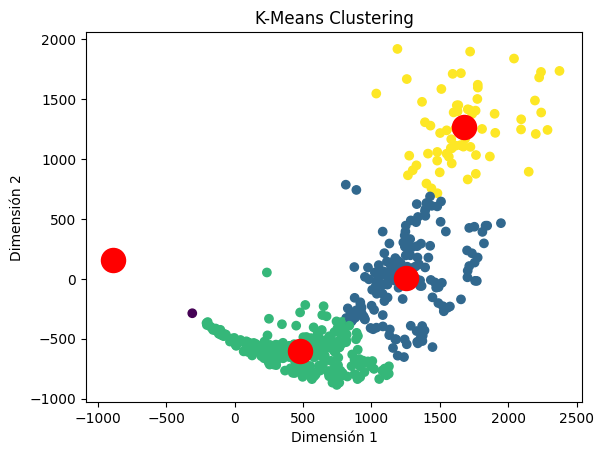

In [ ]:
# Visualización (en este caso, para dos dimensiones)
plt.figure()
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('K-Means Clustering')
plt.show()


In [ ]:
loadings = pca.components_.T  # Transponer para que coincida con la forma original de los datos
loadings

array([[ 2.95415608e-04, -3.13899654e-04,  1.23764126e-04, ...,
         2.23303810e-04, -2.16433182e-04,  9.10155504e-05],
       [ 4.37279756e-04, -4.38763964e-04,  3.19118495e-04, ...,
        -1.03440208e-04, -4.59299132e-04,  9.58316159e-05],
       [-7.32711866e-04,  5.76386927e-04, -4.09131695e-04, ...,
        -1.08568725e-04,  2.79502070e-04,  1.27622276e-04],
       ...,
       [ 7.92139781e-06,  2.72754514e-05,  6.13578668e-05, ...,
        -2.21621536e-04, -1.63141594e-04,  4.18197073e-04],
       [-1.08018994e-05, -3.71937822e-05, -8.36697945e-05, ...,
         3.02211149e-04,  2.22465795e-04, -5.70268487e-04],
       [ 2.97052452e-06,  1.02282984e-05,  2.30092046e-05, ...,
        -8.31080470e-05, -6.11780706e-05,  1.56823808e-04]], dtype=float32)

In [ ]:
columns = [f'PC{i+1}' for i in range(n_components)]
columns

['PC1']

#Otras Pruebas

In [ ]:
# Aplicar KMeans para realizar clustering
n_clusters = 2  # ajusta el número de clusters según tus necesidades
kmeans_p = KMeans(n_clusters=n_clusters, random_state=42)
clusters_p = kmeans_p.fit_predict(features_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
labels_p = kmeans_p.labels_

In [ ]:
centroids_p = kmeans_p.cluster_centers_

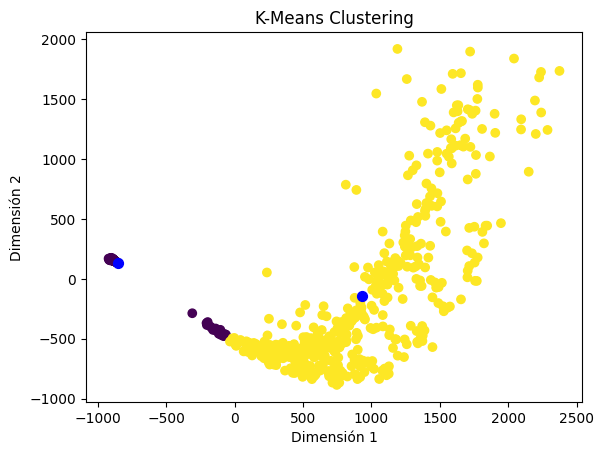

In [ ]:
# Visualización (en este caso, para dos dimensiones)
plt.figure()
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels_p, cmap='viridis')
plt.scatter(centroids_p[:, 0], centroids_p[:, 1], s=50, c='blue')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('K-Means Clustering')
plt.show()


In [ ]:

import numpy as np
unique_labels, counts = np.unique(labels_p, return_counts=True)
for label, count in zip(unique_labels, counts):
  print(f"Cluster {label}: {count} elements")

Cluster 0: 513 elements
Cluster 1: 471 elements


In [ ]:
labels_p

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#Otras Cosas

In [ ]:
loadings_df = pd.DataFrame(processed_data, columns=columns)
loadings_df

NameError: name 'processed_data' is not defined

In [ ]:
hidden_states_4_convert

,HumanEval/0,HumanEval/1,HumanEval/2,HumanEval/3,HumanEval/4,HumanEval/5,HumanEval/6,HumanEval/7,HumanEval/8,HumanEval/9,...,HumanEval/160,HumanEval/161,HumanEval/162,HumanEval/163,codellama,codegen,nl,multi,python,chat
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
980,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
981,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
982,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
df

In [ ]:
# Añadir información adicional a loadings_df si es necesario
# Por ejemplo, asumiendo que 'hidden_states_4_convert' es un DataFrame
# con información adicional relacionada con los hidden states
loadings_df['codellama'] = df['codellama'].tolist()
loadings_df['codegen'] = df['codegen'].tolist()
loadings_df['nl'] = df['nl'].tolist()
loadings_df['multi'] = df['multi'].tolist()
loadings_df['python'] = df['python'].tolist()
loadings_df['chat'] = df['chat'].tolist()
# Añade otras columnas según sea necesario

# Visualizar el DataFrame con los coeficientes de carga
print(loadings_df.head())

In [ ]:
data = []
arrays = []
arrays_ajustados = []
df = []
features_flatten = []
features = []
features_normalized = []

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Suponiendo que 'hidden_states' es tu array 4D de tamaño [n, 1, 455, 4096]

# Tamaño del lote (ajusta según tu capacidad de memoria)
batch_size = 10

# Número total de muestras
total_samples = hidden_states.shape[0]

# Número total de lotes
total_batches = total_samples // batch_size + 1

# Inicializar el normalizador
scaler = StandardScaler()

# Inicializar PCA
n_components = 12  # ajusta según tus necesidades
pca = PCA(n_components=n_components)

# Almacena los datos originales y procesados
original_data = []
processed_data = []

# Procesar los datos por lotes
for batch_idx in range(total_batches):
    start_idx = batch_idx * batch_size
    end_idx = min((batch_idx + 1) * batch_size, total_samples)

    # Seleccionar un lote
    batch_data = hidden_states[start_idx:end_idx, 0, :, :]

    # Aplanar el lote
    flattened_batch = batch_data.reshape((end_idx - start_idx, -1))

    # Normalizar el lote
    normalized_batch = scaler.fit_transform(flattened_batch)

    # Puedes realizar otras operaciones con el lote aquí

    # Actualizar los datos originales y procesados
    original_data.append(flattened_batch)
    processed_data.append(normalized_batch)

# Concatenar los datos originales y procesados
original_data = np.concatenate(original_data, axis=0)
processed_data = np.concatenate(processed_data, axis=0)

# Aplicar PCA a los datos procesados
pca_result = pca.fit_transform(processed_data)

# Obtener los coeficientes de carga
loadings = pca.components_.T  # Transponer para que coincida con la forma original de los datos

# Crear un DataFrame para visualizar los resultados
columns = [f'PC{i+1}' for i in range(n_components)]
loadings_df = pd.DataFrame(loadings, columns=columns)

# Añadir información adicional a loadings_df si es necesario
# Por ejemplo, asumiendo que 'hidden_states_4_convert' es un DataFrame
# con información adicional relacionada con los hidden states
loadings_df['ruta'] = used['ruta'].tolist()
loadings_df['prumt'] = used['prumt'].tolist()
# Añade otras columnas según sea necesario

# Visualizar el DataFrame con los coeficientes de carga
print(loadings_df.head())


InvalidIndexError: ignored

# K means GPU

In [ ]:
pip install kmeans-gpu

In [ ]:
from kmeans_gpu import KMeans
import torch

# Config
batch_size = 128
feature_dim = 1024
pts_dim = 3
num_pts = 256
num_cluster = 15

# Create data
features = torch.randn(batch_size, feature_dim, num_pts)
# Pay attention to the different dimension order between features and points.
points = torch.randn(batch_size, num_pts, pts_dim)

# Create KMeans Module
kmeans = KMeans(
    n_clusters=num_cluster,
    max_iter=100,
    tolerance=1e-4,
    distance='euclidean',
    sub_sampling=None,
    max_neighbors=15,
)

# Forward
centroids, features = kmeans(points, features)

print(centroids.shape, features.shape)
# output:
# >>> torch.Size([128, 15, 3]) torch.Size([128, 1024, 15])


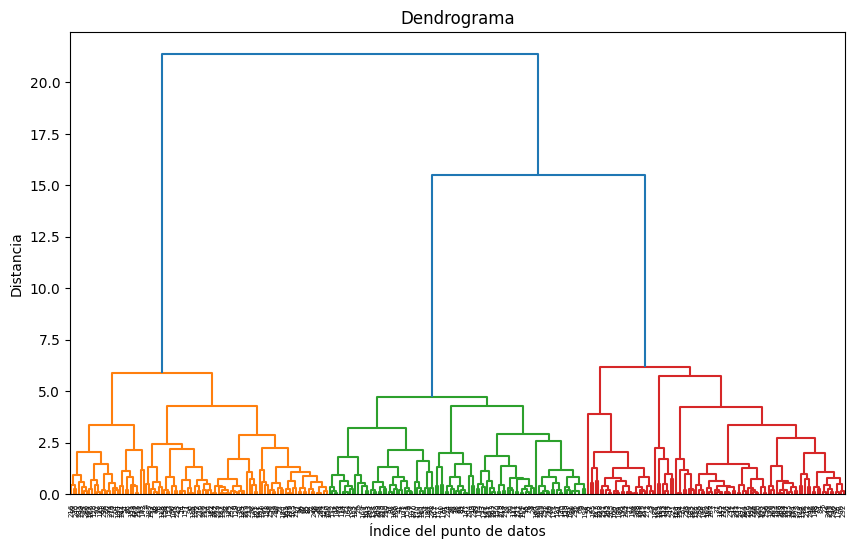

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


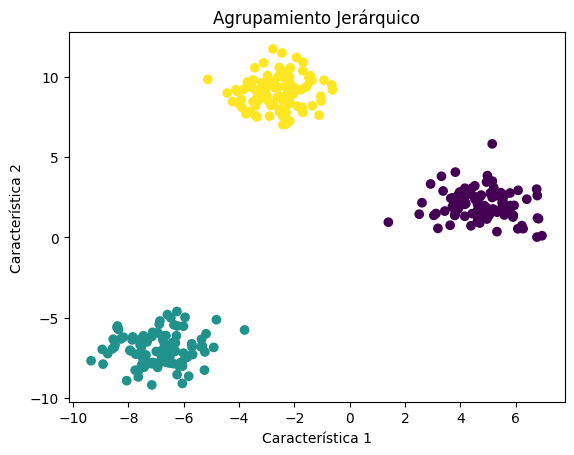

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Generar datos de ejemplo
X, y = make_blobs(n_samples=300, centers=3, random_state=42)

# Aplicar agrupamiento jerárquico con enlace completo
linkage_matrix = linkage(X, method='complete')

# Visualizar el dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Dendrograma')
plt.xlabel('Índice del punto de datos')
plt.ylabel('Distancia')
plt.show()

# Aplicar agrupamiento jerárquico con enlace completo
n_clusters = 3
model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='complete')
labels = model.fit_predict(X)

# Visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Agrupamiento Jerárquico')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()
